In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

import mlflow
import mlflow.tensorflow

Text(0.5, 1.0, '0')

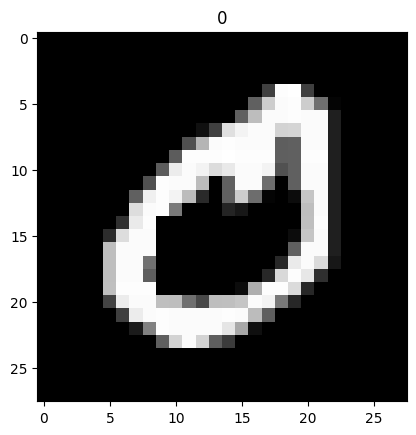

In [2]:
# Carregando os dados do MNIST
(X_treinamento, y_treinamento), (X_Teste, y_teste) = mnist.load_data()

# Exibindo uma imagem do dataset
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

In [3]:
# Preprocessamento dos dados
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_Teste = X_Teste.reshape((len(X_Teste), np.prod(X_Teste.shape[1:])))

In [4]:
X_Teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
X_treinamento = X_treinamento.astype('float32')
X_Teste = X_Teste.astype('float32')

X_treinamento /= 255
X_Teste /= 255

In [6]:
y_treinamento = to_categorical(y_treinamento, 10)
y_teste = to_categorical(y_teste, 10)

In [7]:
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [14]:
def treina_dl(n_camadas_ocultas, n_units, activation, drop_out, epochs):
    mlflow.set_experiment("DLExperimento")
    
    with mlflow.start_run():
        mlflow.tensorflow.autolog()
        
        modelo = Sequential()
        
        # Criando camada oculta + camada de entrada
        modelo.add(Dense(units = n_units, activation = activation, input_dim=784))
        modelo.add(Dropout(drop_out))
        
        # camadas ocultas adicionais
        for n in range(n_camadas_ocultas):
            modelo.add(Dense(units = n_units, activation = activation))
            modelo.add(Dropout(drop_out))
            
        # camada de saida
        modelo.add(Dense(units=10, activation='softmax'))
        
        modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        modelo.summary()
        
        historico = modelo.fit(X_treinamento, y_treinamento, epochs=epochs,
                               validation_data=(X_Teste, y_teste))
        
        # Grafico pra erro e acuracia
        historico.history.keys()
        loss = plt.plot(historico.history['val_loss'])
        plt.savefig('loss.png')
        acuracia = plt.plot(historico.history['val_accuracy'])
        plt.savefig('acuracia.png')
        
        # Registrando artefatos
        mlflow.log_artifact("loss.png")
        mlflow.log_artifact("acuracia.png")
        
        # informações da execução
        print(f"Modelo: {mlflow.active_run().info.run_uuid}")
    
    mlflow.end_run()

2024/03/17 04:02:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,274 (51.85 KB)

 Trainable params: 13,274 (51.85 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4803 - loss: 1.4088

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4822 - loss: 1.4045 - val_accuracy: 0.8947 - val_loss: 0.4253
Epoch 2/2
1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.7077

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7879 - loss: 0.7074 - val_accuracy: 0.9107 - val_loss: 0.3378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Modelo: fecc3feda8b64934a7b37869833dc4ae


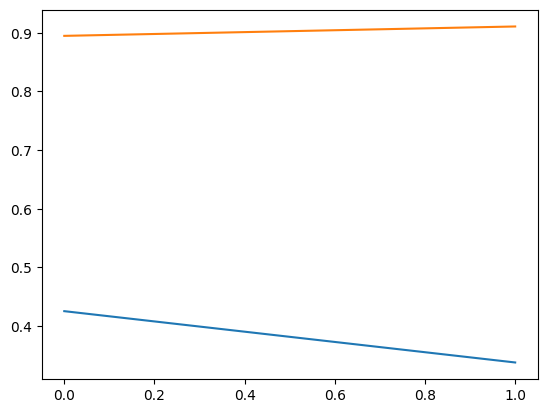

In [15]:
treina_dl(2, 16, 'relu', 0.2, 2)